In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

In [3]:
df = pd.read_csv('../datascience/data/lightfm_stat_interpretation.csv')

In [4]:
df.head()

,bucket,retailers_bucketed,retailers_ordering,pct_retailers_ordering,avg_brands_per_order,total_order_volume,avg_order_volume,avg_order_volume_per_ordering_retailer,median_order_volume_per_ordering_retailer
0,control,2446,405,0.165576,1.990123,246480.0,100.768602,608.592593,289.0
1,lightfm_feb_2019,2454,381,0.155257,1.971129,196261.0,79.975958,515.120735,300.0
2,impression_freshness,2520,361,0.143254,2.069252,182189.0,72.297222,504.678670,286.0


## Stat parameters

alpha = 0.9
beta = 0.2

delta >= 5%

n?

### Let's do pairwise A/B two-tailed proportional test.

### Proportion A/B test review

Z = (p1 - p2) / {P*(1-P)(1/n1 + 1/n2)}^1/2,

P = (p1n1 + p2n2) / (n1+n2)

## How much n do we need for 2-tailed A/B test with parameters above?

Z < -1.96 or Z > 1.96 for alpha = 0.05

Z < -1.28 or Z > 1.28 for alpha = 0.1

if delta = 10% and n = (nA + nB)/2 and p(control) = 0.165576:

In [54]:
p1 = 0.172
delta = 0.1
p2 = p1 + delta*p1

In [55]:
P = (p1 + p2)/2
print(P)

0.18059999999999998


### Values below are for 2-tailed tests

In [56]:
# A/B test with alpha = 0.1
Z = 1.64

In [57]:
# A/B/C test with Bonferroni correction for alpha = 0.1
Z = 1.96

In [58]:
# A/B/C test with Bonferroni correction for alpha = 0.05
Z = 2.24

In [59]:
# A/B test with Bonferroni correction for alpha = 0.05
Z = 1.96

In [60]:
Z = 1.96
# Z=2.24

In [61]:
n = (p1+p2) * (2 - p1 - p2)*pow(Z,2)/pow(p1-p2,2)
print(n)

7686.505562790703


## For current data (February 15th)

In [5]:
n0 = 2446
p0 = 0.165576

n1 = 2454
p1 = 0.155257

In [6]:
P_01 = (n0*p0 + n1*p1) / (n0+n1)

In [12]:
Z = (p1 - p0) / math.sqrt(P_01*(1-P_01)*(1/n0 + 1/n1))
print(Z)

-0.9841421586979032


/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


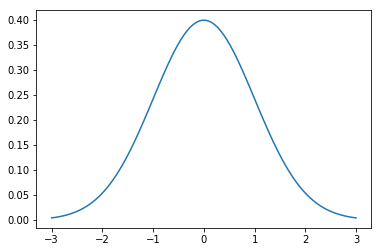

In [16]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

# AVG order volume Z-score